In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install imagecodecs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 MB 20.2 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import numpy as np


In [ ]:
data_num = {}
for i in os.listdir("/content/drive/MyDrive/personal research/Dataset/Cauliflower"):
  try:
    c = len(os.listdir(os.path.join("/content/drive/MyDrive/personal research/Dataset/Cauliflower",i)))
    print(i+": "+str(c))
    data_num[i] = c
  except:
    pass

Black Rot: 560
Fresh leaf: 526
Downy mildew: 512


In [ ]:
# def flip_image(image,dir):
#     image = cv2.flip(image, dir)
#     cv2.imwrite(Folder_name + "/flip-" + str(dir)+Extension, image)
# folder_path = "/content/drive/MyDrive/New Dataset/Extra Teeth"
# for img in os.listdir(folder_path):
#     simg_path = os.path.join(folder_path,img)
#     print(simg_path)


#     image_file=simg_path
#     Folder_name=folder_path
#     Extension=image_file.split("/")[-1]
#     image=cv2.imread(image_file)

#     flip_image(image,-1)#both



In [ ]:
# def flip_image(image,dir):
#     image = cv2.flip(image, dir)
#     cv2.imwrite(Folder_name + "/flip-" + str(dir)+Extension, image)
# folder_path = "/content/drive/MyDrive/New Dataset/Bone Lost"
# for img in os.listdir(folder_path):
#     simg_path = os.path.join(folder_path,img)
#     print(simg_path)


#     image_file=simg_path
#     Folder_name=folder_path
#     Extension=image_file.split("/")[-1]
#     image=cv2.imread(image_file)

#     flip_image(image,-1)#both



In [ ]:
# def flip_image(image,dir):
#     image = cv2.flip(image, dir)
#     cv2.imwrite(Folder_name + "/flip-" + str(dir)+Extension, image)
# folder_path = "/content/drive/MyDrive/New Dataset/Dental Caries"
# for img in os.listdir(folder_path):
#     simg_path = os.path.join(folder_path,img)
#     print(simg_path)


#     image_file=simg_path
#     Folder_name=folder_path
#     Extension=image_file.split("/")[-1]
#     image=cv2.imread(image_file)

#     flip_image(image,-1)#both



In [ ]:
data_num = {}
for i in os.listdir("/content/drive/MyDrive/personal research/Dataset/Cauliflower"):
  try:
    c = len(os.listdir(os.path.join("/content/drive/MyDrive/personal research/Dataset/Cauliflower",i)))
    print(i+": "+str(c))
    data_num[i] = c
  except:
    pass

Black Rot: 560
Fresh leaf: 526
Downy mildew: 512


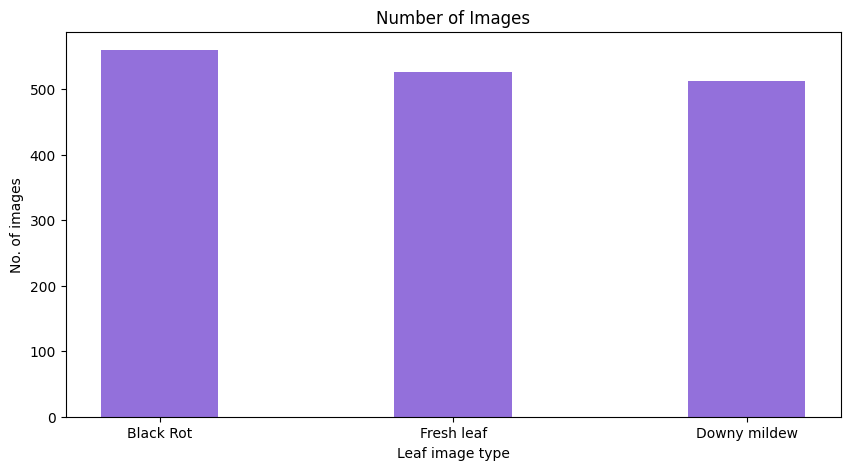

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = data_num
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='mediumpurple',
        width = 0.4)

plt.xlabel("Leaf image type")
plt.ylabel("No. of images")
plt.title("Number of Images")
plt.show()

In [ ]:
import cv2
import numpy as np
from skimage.exposure import rescale_intensity
from skimage.segmentation import slic
from skimage.util import img_as_float
from skimage import io

# RESIZE
def resize_image(image, w, h):
    resized_image = cv2.resize(image, (w, h))
    cv2.imwrite(Folder_name + "/Resize-" + str(w) + "x" + str(h) + Extension, resized_image)
    return resized_image

# CROP
def crop_image(image, y1, y2, x1, x2):
    cropped_image = image[y1:y2, x1:x2]
    cv2.imwrite(Folder_name + "/Crop-" + str(x1) + "-" + str(x2) + "x" + str(y1) + "-" + str(y2) + Extension, cropped_image)
    return cropped_image

# PADDING
def padding_image(image, topBorder, bottomBorder, leftBorder, rightBorder, color_of_border=[0, 0, 0]):
    padded_image = cv2.copyMakeBorder(image, topBorder, bottomBorder, leftBorder, rightBorder, cv2.BORDER_CONSTANT, value=color_of_border)
    cv2.imwrite(Folder_name + "/Padd-" + str(topBorder) + "-" + str(bottomBorder) + "x" + str(leftBorder) + "-" + str(rightBorder) + Extension, padded_image)
    return padded_image

# FLIP
def flip_image(image, dir):
    flipped_image = cv2.flip(image, dir)
    cv2.imwrite(Folder_name + "/Flip-" + str(dir) + Extension, flipped_image)
    return flipped_image

# SUPERPIXELS
def superpixel_image(image_path, segments):
    def segment_colorfulness(image, mask):
        (B, G, R) = cv2.split(image.astype("float"))
        R = np.ma.masked_array(R, mask=mask)
        G = np.ma.masked_array(G, mask=mask)
        B = np.ma.masked_array(B, mask=mask)

        rg = np.absolute(R - G)
        yb = np.absolute(0.5 * (R + G) - B)

        stdRoot = np.sqrt((rg.std() ** 2) + (yb.std() ** 2))
        meanRoot = np.sqrt((rg.mean() ** 2) + (yb.mean() ** 2))

        return stdRoot + (0.3 * meanRoot)

    orig = cv2.imread(image_path)
    vis = np.zeros(orig.shape[:2], dtype="float")

    image = io.imread(image_path)
    segments = slic(img_as_float(image), n_segments=segments, slic_zero=True)

    for v in np.unique(segments):
        mask = np.ones(image.shape[:2])
        mask[segments == v] = 0

        C = segment_colorfulness(orig, mask)
        vis[segments == v] = C

    vis = rescale_intensity(vis, out_range=(0, 255)).astype("uint8")

    alpha = 0.6
    overlay = np.dstack([vis] * 3)
    output = orig.copy()
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)

    cv2.imwrite(Folder_name + "/Superpixels-" + str(segments) + Extension, output)
    return output

# INVERT IMAGE
def invert_image(image, channel=255):
    inverted_image = (channel - image)
    cv2.imwrite(Folder_name + "/Invert-" + str(channel) + Extension, inverted_image)
    return inverted_image

# ADD LIGHT
def add_light(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    light_image = cv2.LUT(image, table)
    if gamma >= 1:
        cv2.imwrite(Folder_name + "/Light-" + str(gamma) + Extension, light_image)
    else:
        cv2.imwrite(Folder_name + "/Dark-" + str(gamma) + Extension, light_image)
    return light_image

# ADD LIGHT COLOR
def add_light_color(image, color, gamma=1.0):
    invGamma = 1.0 / gamma
    color_image = (color - image)
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    color_image = cv2.LUT(color_image, table)
    if gamma >= 1:
        cv2.imwrite(Folder_name + "/LightColor-" + str(gamma) + Extension, color_image)
    else:
        cv2.imwrite(Folder_name + "/DarkColor-" + str(gamma) + Extension, color_image)
    return color_image

# SATURATION IMAGE
def saturation_image(image, saturation):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    v = hsv_image[:, :, 2]
    v = np.where(v <= 255 - saturation, v + saturation, 255)
    hsv_image[:, :, 2] = v
    saturated_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
    cv2.imwrite(Folder_name + "/Saturation-" + str(saturation) + Extension, saturated_image)
    return saturated_image

# HUE IMAGE
def hue_image(image, saturation):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    v = hsv_image[:, :, 2]
    v = np.where(v <= 255 + saturation, v - saturation, 255)
    hsv_image[:, :, 2] = v
    hue_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
    cv2.imwrite(Folder_name + "/Hue-" + str(saturation) + Extension, hue_image)
    return hue_image

# CHANGE BLACK BACKGROUND TO WHITE
def change_background_to_white(image):
    if image is not None:
        image[np.all(image == [0, 0, 0], axis=-1)] = [255, 255, 255]
    else:
        print("Error: Image could not be loaded. Please check the image path.")
    return image

# Apply all preprocessing techniques to the input image
image_path = "input_image.jpg"  # Specify your image path
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found. Please check the file path.")
else:
    image = change_background_to_white(image)
    image = resize_image(image, 224, 224)
    image = crop_image(image, 10, 200, 10, 200)
    image = padding_image(image, 20, 20, 20, 20)
    image = flip_image(image, 1)
    invert_image(image)
    add_light(image, gamma=1.5)
    add_light_color(image, [100, 50, 150], gamma=0.8)
    saturation_image(image, 50)
    hue_image(image, 50)
    superpixel_image(image_path, 100)


Error: Image not found. Please check the file path.


In [ ]:
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import keras
#ImageDataGenerator has been moved to tf.keras.preprocessing.image since Keras 2.3.0
from tensorflow.keras.preprocessing.image import ImageDataGenerator #import ImageDataGenerator from tensorflow.keras.preprocessing.image instead of keras.preprocessing.image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

In [ ]:
#Load the dataset
BATCH_SIZE = 32
IMAGE_SIZE = 299
CHANNELS=3
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/personal research/Dataset/Cauliflower',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1598 files belonging to 3 classes.


In [ ]:
#Class name in my dataset
class_name=dataset.class_names
class_name


['Black Rot', 'Downy mildew', 'Fresh leaf']

In [ ]:
#image shape
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 299, 299, 3)
[1 2 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 2 2 0 0 1 1 0 0 0 2 0 0 1 2 2]


In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[ 7.658863  16.658863  25.658863 ]
  [ 7.658863  16.658863  25.658863 ]
  [ 7.658863  16.658863  25.658863 ]
  ...
  [21.329432  26.329432  29.329432 ]
  [19.67844   24.67844   27.67844  ]
  [17.329395  22.329395  25.329395 ]]

 [[ 4.        13.        22.       ]
  [ 4.        13.        22.       ]
  [ 4.        13.        22.       ]
  ...
  [19.988295  24.988295  27.988295 ]
  [17.035019  22.035019  25.035019 ]
  [13.341064  18.341064  21.341064 ]]

 [[ 6.352843  15.352842  24.352842 ]
  [ 6.352843  15.352842  24.352842 ]
  [ 6.352843  15.352842  24.352842 ]
  ...
  [18.        23.        26.       ]
  [19.685698  24.685698  27.685698 ]
  [14.717282  19.717281  22.717281 ]]

 ...

 [[14.542625  20.542625  16.542625 ]
  [ 9.992425  15.992425  12.015836 ]
  [ 9.705687  15.705687  14.411373 ]
  ...
  [ 5.7056885 11.705688   9.705688 ]
  [10.278397  16.278397  14.278397 ]
  [10.352844  16.352844  14.352844 ]]

 [[ 9.399744  15.399744  11.399744 ]
  [ 8.0233    14.0233    10.046712 ]


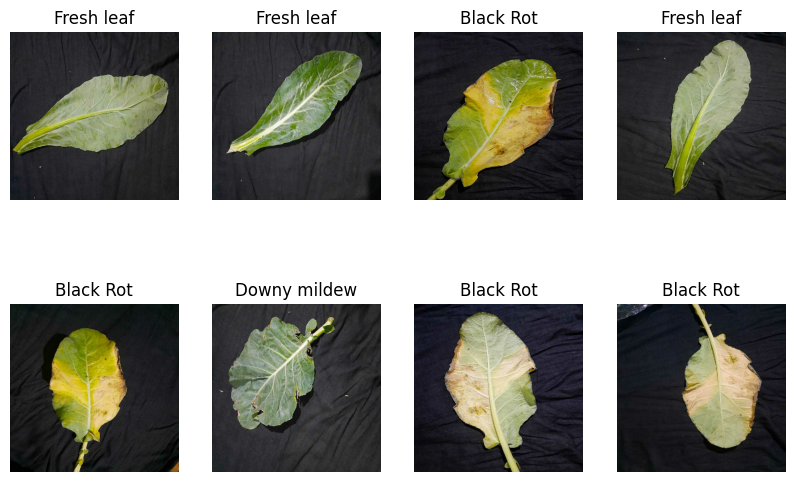

In [ ]:
#some data visualization for understanding
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(2):
  for i in range(8):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_name[labels_batch[i]])
    plt.axis("off")

Splitting

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.7, val_split=0.2, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [ ]:
# Optimize the data pipeline for training
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Validation and test datasets should only be cached and prefetched, without shuffling
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Updated preprocessing layers location for newer TensorFlow/Keras versions
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # Removed 'experimental.preprocessing'
    layers.Rescaling(1./255)   # Removed 'experimental.preprocessing'
])

Model Implementation


# Resnet50

In [ ]:
#Resnet50 model
conv_base = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape = (299,299,3))


for layer in conv_base.layers:
    layer.trainable = False


x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.6)(x)
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)


model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20
)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 261s 792ms/step - accuracy: 0.6083 - loss: 1.9263 - val_accuracy: 1.0000 - val_loss: 0.0248
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.9873 - loss: 0.0365 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 181ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 7.4322e-04
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 182ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 7.4590e-04
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 182ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 6.1521e-04
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 4.6518e-04
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - accuracy: 1.0000 - loss: 0.001

In [ ]:
#Testing the model
scores = model.evaluate(test_ds)

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 1.0000 - loss: 1.5057e-04


first image to predict
actual label: Black Rot
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
predicted label: Black Rot


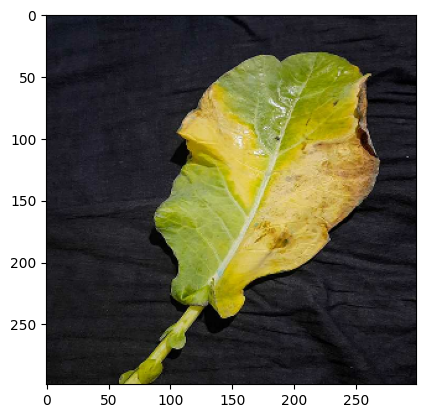

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


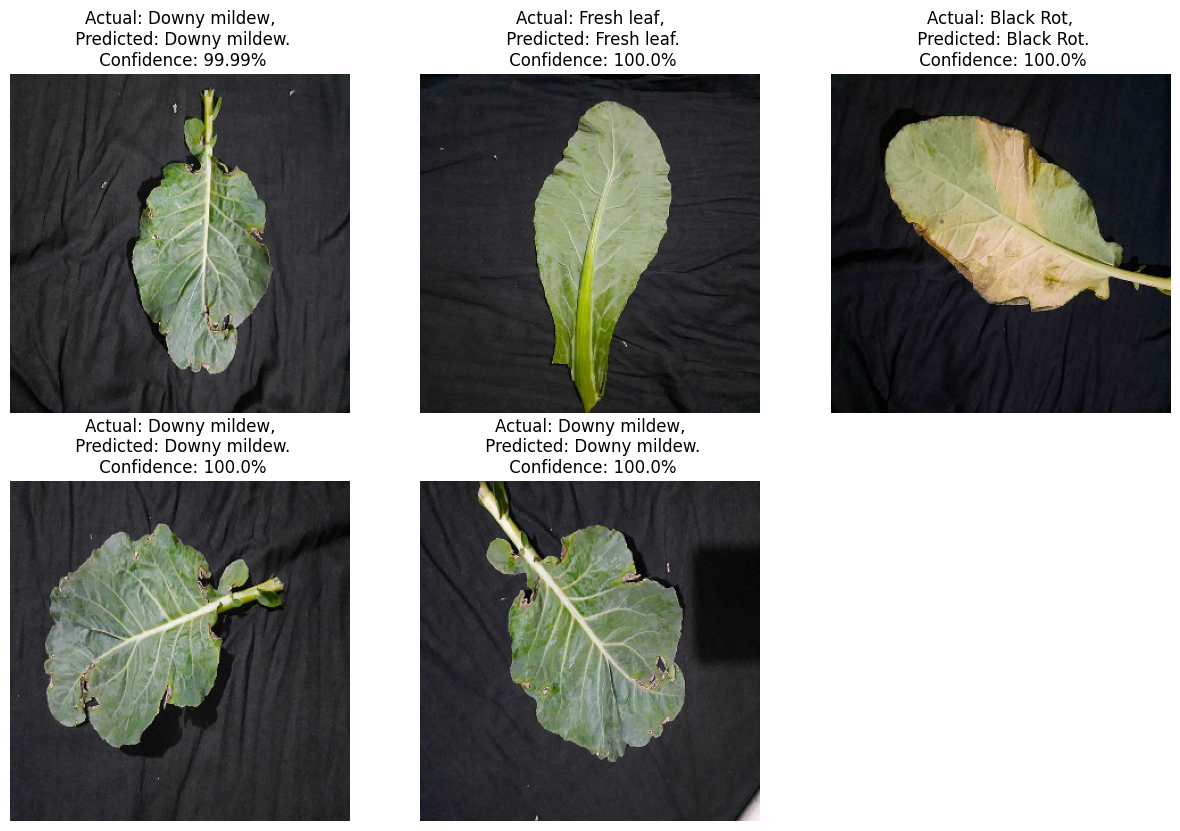

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(2):
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence =predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

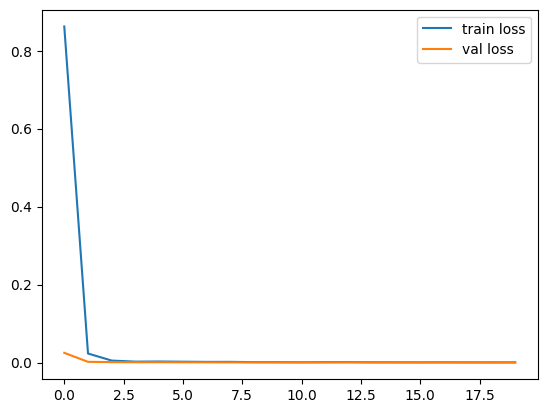

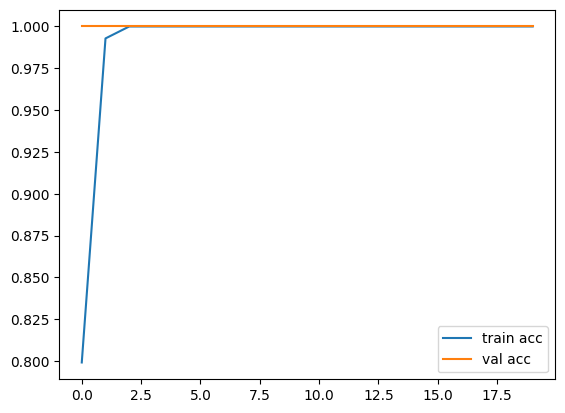

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
predicted = []
actual = []
for images, labels in test_ds:
  for i in range(5):
    predicted_class, confidence =predict(model, images[i].numpy())
    predicted.append(predicted_class)
    actual.append(class_name[labels[i]])
    print(predicted_class,class_name[labels[i]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Black Rot Black Rot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Black Rot Black Rot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Black Rot Black Rot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Downy mildew Downy mildew
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Downy mildew Downy mildew
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Downy mildew Downy mildew
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Fresh leaf Fresh leaf
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Black Rot Black Rot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Downy mildew Downy mildew
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Downy mildew Downy mildew
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Fresh leaf Fresh leaf
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Downy mildew Downy mildew
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Fresh leaf Fresh leaf
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Downy mildew Downy mildew
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Fresh leaf Fresh leaf
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Black Rot Black Rot
1/1 ━━━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(actual, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [1. 1. 1.]
recall: [1. 1. 1.]
fscore: [1. 1. 1.]


In [ ]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

con_matrix = confusion_matrix(actual, predicted)
con_matrix

array([[10,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  4]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:.2}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:.2%}; misclass={:.2%}'.format(accuracy, misclass))
    plt.show()

# Example usage:
# Assuming cm is your confusion matrix and target_names is a list of class labels
# plot_confusion_matrix(cm, target_names)

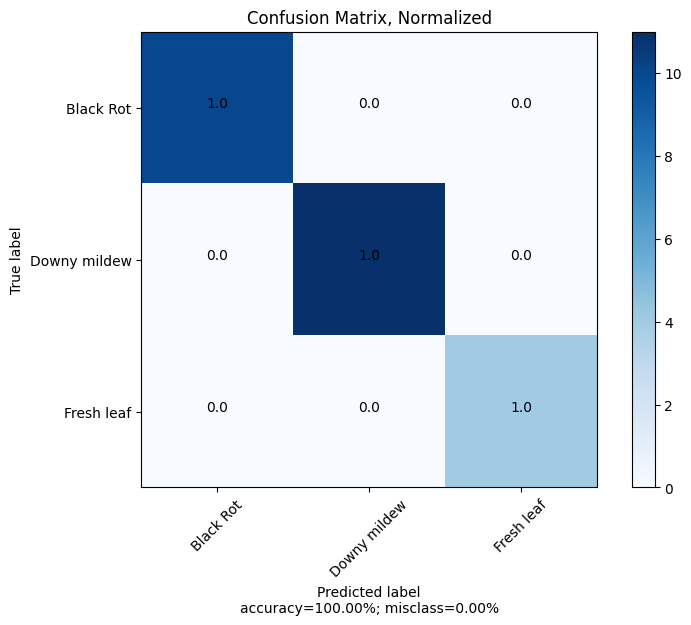

In [ ]:
plot_confusion_matrix(cm           = con_matrix,
                      normalize    = True,
                      target_names = class_name,
                      title        = "Confusion Matrix, Normalized")

##VGG 16

In [ ]:
#vgg16 model
conv_base = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape = (299,299,3))


for layer in conv_base.layers:
    layer.trainable = False


x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20
)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 53s 917ms/step - accuracy: 0.7508 - loss: 2.0254 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 306ms/step - accuracy: 1.0000 - loss: 7.8929e-04 - val_accuracy: 1.0000 - val_loss: 2.2919e-04
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 313ms/step - accuracy: 1.0000 - loss: 2.4014e-04 - val_accuracy: 1.0000 - val_loss: 7.9610e-05
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 319ms/step - accuracy: 1.0000 - loss: 4.3216e-05 - val_accuracy: 1.0000 - val_loss: 9.2318e-05
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 326ms/step - accuracy: 1.0000 - loss: 1.9733e-05 - val_accuracy: 1.0000 - val_loss: 5.4819e-05
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 318ms/step - accuracy: 1.0000 - loss: 1.1400e-05 - val_accuracy: 1.0000 - val_loss: 4.1047e-05
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 308ms/step - accuracy: 1.0000 - loss: 6.3820e-06 - val_accuracy: 1.0000 - val_loss: 3.5342e-05
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 318ms/s

In [ ]:
#Testing the model
scores = model.evaluate(test_ds)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 1.0000 - loss: 2.1262e-06


first image to predict
actual label: Black Rot
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step
predicted label: Black Rot


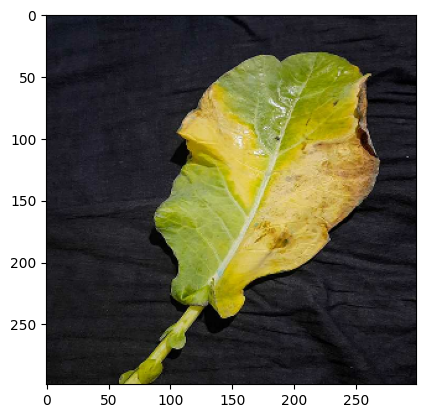

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


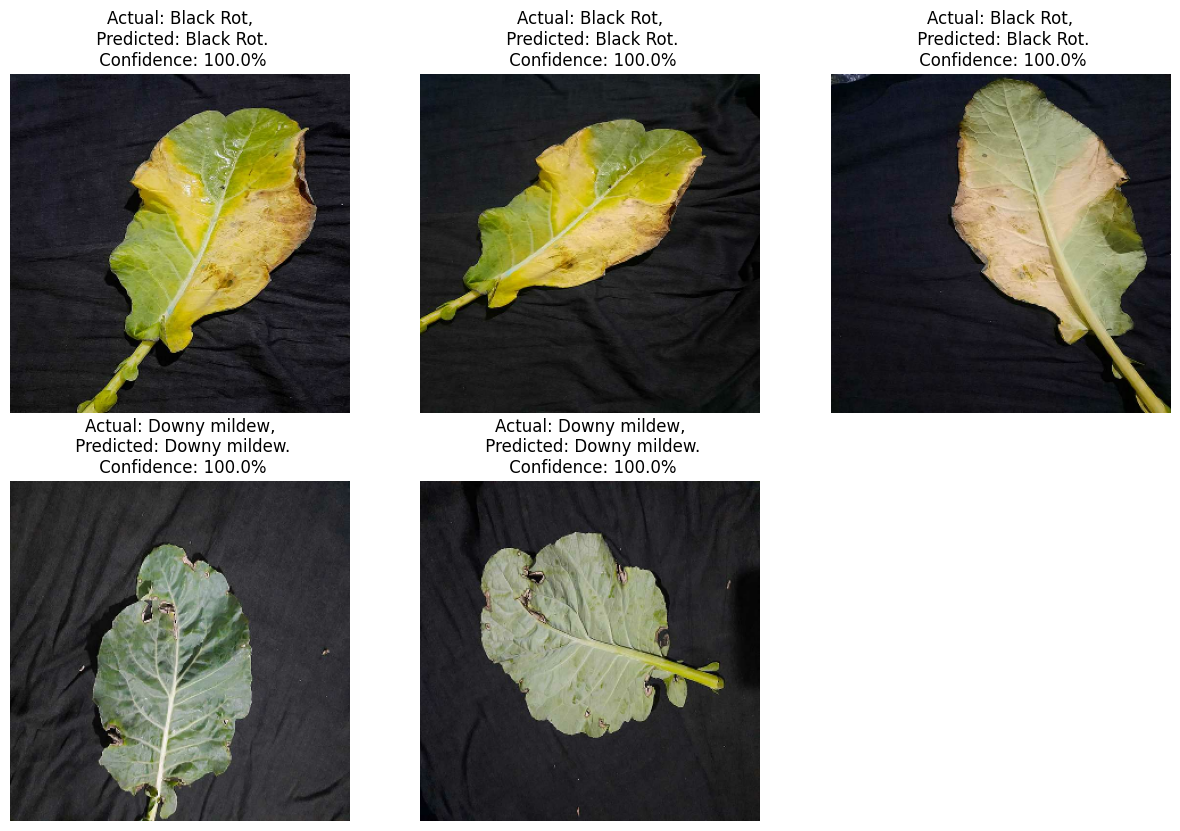

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence =predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")


        plt.axis("off")

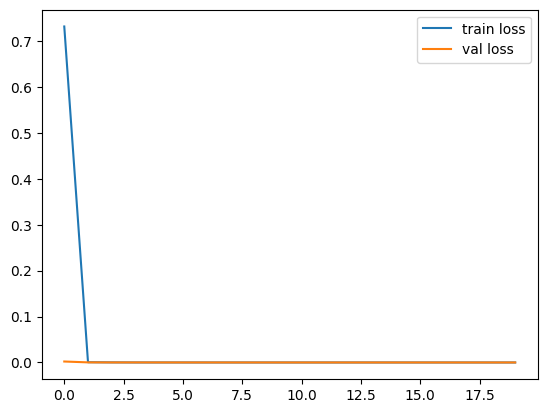

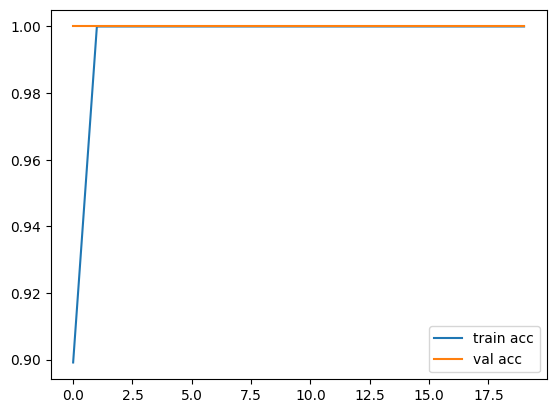

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
predicted = []
actual = []
for images, labels in test_ds:
  for i in range(5):
    predicted_class, confidence =predict(model, images[i].numpy())
    predicted.append(predicted_class)
    actual.append(class_name[labels[i]])
    # print(predicted_class,class_name[labels[i]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(actual, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))


precision: [1. 1. 1.]
recall: [1. 1. 1.]
fscore: [1. 1. 1.]


In [ ]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

con_matrix = confusion_matrix(actual, predicted)
con_matrix

array([[10,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  4]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:.2}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:.2%}; misclass={:.2%}'.format(accuracy, misclass))
    plt.show()

# Example usage:
# Assuming cm is your confusion matrix and target_names is a list of class labels
# plot_confusion_matrix(cm, target_names)


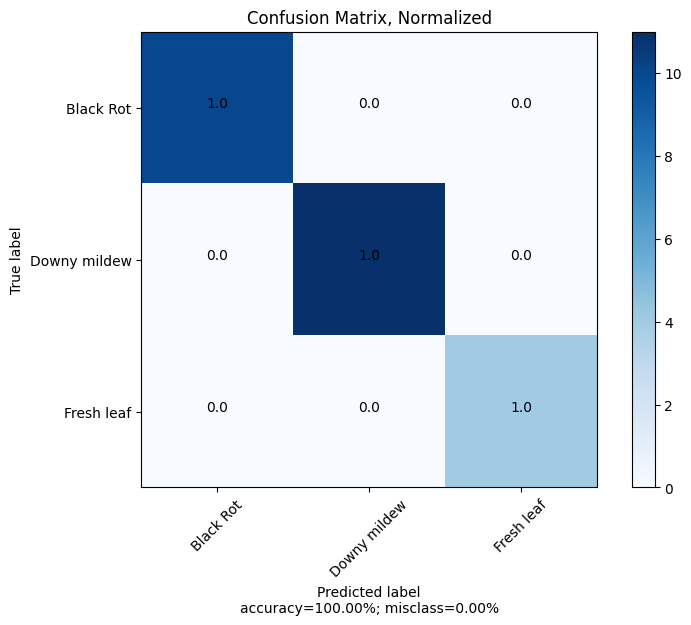

In [ ]:
plot_confusion_matrix(cm           = con_matrix,
                      normalize    = True,
                      target_names = class_name,
                      title        = "Confusion Matrix, Normalized")

# VGG19

In [ ]:
# Check for NaN values in the input dataset
for image, label in train_ds:
    if tf.reduce_any(tf.math.is_nan(image)):
        print("NaN values found in input data!")

In [ ]:
#vgg19 model
conv_base = VGG19(
    include_top=False,
    weights='imagenet',
    input_shape = (299,299,3))


for layer in conv_base.layers:
    layer.trainable = False


# Modified VGG16 with dropout
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)  # Adding dropout
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)  # Adding dropout
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
#Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20
)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 431ms/step - accuracy: 0.3314 - loss: 1.2041 - val_accuracy: 0.3145 - val_loss: 1.6140
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 17s 395ms/step - accuracy: 0.3245 - loss: 1.1876 - val_accuracy: 0.3270 - val_loss: 1.5502
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 380ms/step - accuracy: 0.3296 - loss: 1.1869 - val_accuracy: 0.3239 - val_loss: 1.5083
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 375ms/step - accuracy: 0.3568 - loss: 1.1658 - val_accuracy: 0.3616 - val_loss: 1.4080
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 388ms/step - accuracy: 0.3674 - loss: 1.1601 - val_accuracy: 0.3805 - val_loss: 1.3617
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 381ms/step - accuracy: 0.3638 - loss: 1.1492 - val_accuracy: 0.3711 - val_loss: 1.3923
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 383ms/step - accuracy: 0.3728 - loss: 1.1207 - val_accuracy: 0.4214 - val_loss: 1.2961
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 391ms/step - accuracy: 0.3683 - loss: 1.1538 - val_accu

In [ ]:
#Testing the model
scores = model.evaluate(test_ds)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step - accuracy: 0.7441 - loss: 0.5786


first image to predict
actual label: Fresh leaf
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
predicted label: Fresh leaf


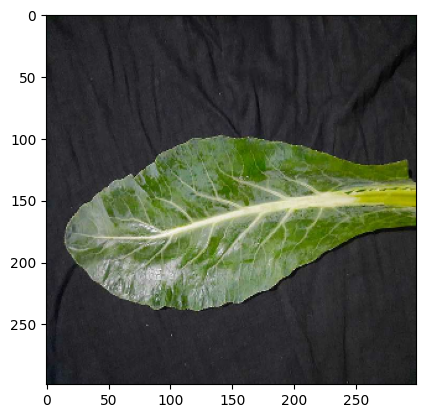

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[5].numpy().astype('uint8')
    first_label = labels_batch[5].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[5])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


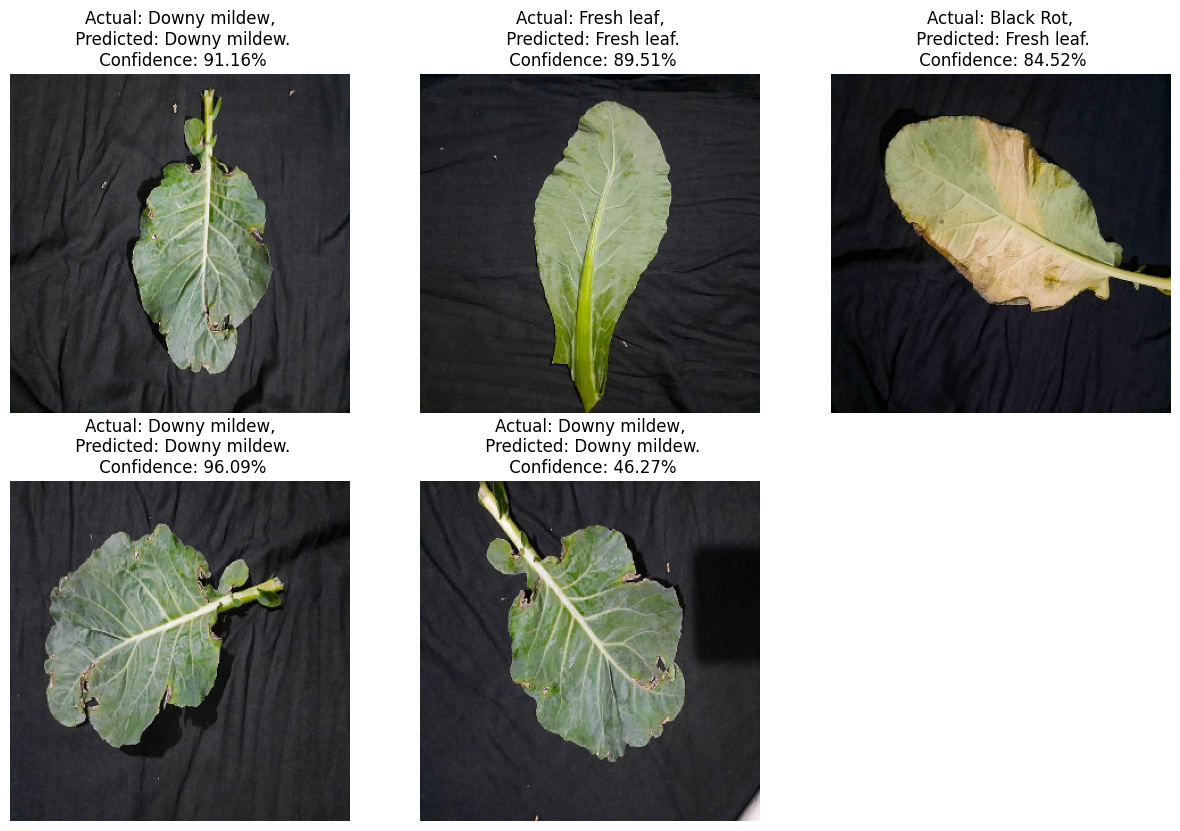

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(2):
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence =predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

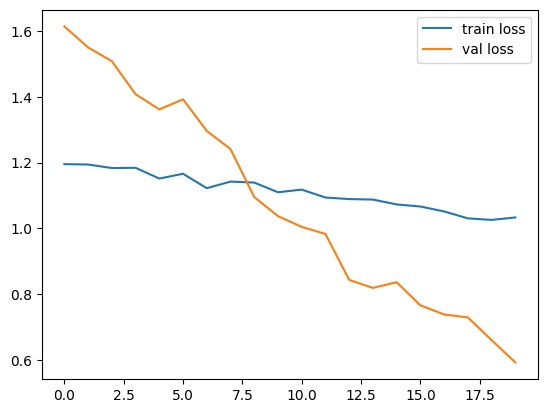

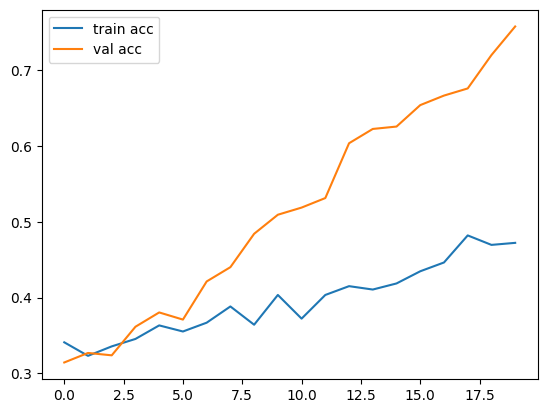

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
predicted = []
actual = []
for images, labels in test_ds:
  for i in range(5):
    predicted_class, confidence =predict(model, images[i].numpy())
    predicted.append(predicted_class)
    actual.append(class_name[labels[i]])
    print(predicted_class,class_name[labels[i]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Fresh leaf Black Rot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Fresh leaf Black Rot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Fresh leaf Black Rot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Downy mildew Downy mildew
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Downy mildew Downy mildew
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Downy mildew Downy mildew
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Fresh leaf Fresh leaf
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Fresh leaf Black Rot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Downy mildew Downy mildew
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Downy mildew Downy mildew
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Fresh leaf Fresh leaf
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Downy mildew Downy mildew
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Fresh leaf Fresh leaf
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Downy mildew Downy mildew
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Fresh leaf Fresh leaf
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Black Rot Black Rot
1/1 ━━━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(actual, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.5        0.88888889 0.28571429]
recall: [0.1        0.72727273 1.        ]
fscore: [0.16666667 0.8        0.44444444]


In [ ]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

con_matrix = confusion_matrix(actual, predicted)
con_matrix

array([[1, 1, 8],
       [1, 8, 2],
       [0, 0, 4]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:.2}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:.2%}; misclass={:.2%}'.format(accuracy, misclass))
    plt.show()

# Example usage:
# Assuming cm is your confusion matrix and target_names is a list of class labels
# plot_confusion_matrix(cm, target_names)


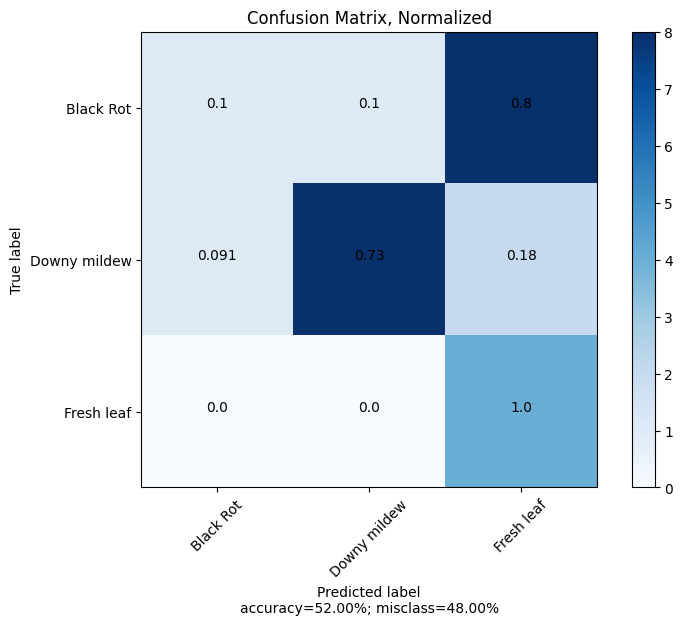

In [ ]:
plot_confusion_matrix(cm           = con_matrix,
                      normalize    = True,
                      target_names = class_name,
                      title        = "Confusion Matrix, Normalized")


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual, predicted, target_names=class_name))

              precision    recall  f1-score   support

   Black Rot       0.50      0.10      0.17        10
Downy mildew       0.89      0.73      0.80        11
  Fresh leaf       0.29      1.00      0.44         4

    accuracy                           0.52        25
   macro avg       0.56      0.61      0.47        25
weighted avg       0.64      0.52      0.49        25

